In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report


In [2]:
# Q1
mnist = fetch_openml('mnist_784')

In [3]:
x = mnist.data
y = mnist.target
X_train , X_test, Y_train, Y_test = train_test_split(mnist.data,mnist.target,test_size = 0.1)
X_train , X_test = (X_train.to_numpy())/255 , (X_test.to_numpy())/255
Y_train  = Y_train.cat.codes
Y_train = Y_train.to_numpy()
Y_test = Y_test.cat.codes
Y_test = Y_test.to_numpy()
meanImgArray = []


In [5]:
for i in range(10):
    
    tempArray = np.vstack(np.mean(X_train[np.where(Y_train==i)],axis=0))
    meanImgArray.append(tempArray)
    tempArray = []

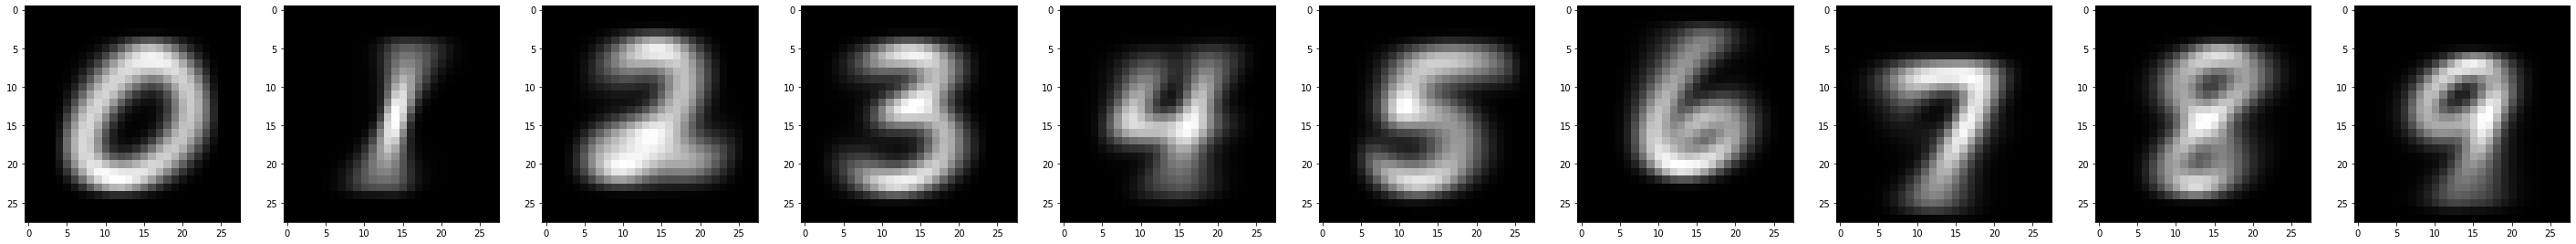

In [6]:
fig,axes=plt.subplots(1,10,figsize=[50,5])
for i in range(10):
    meanImgArray[i] = meanImgArray[i].reshape(28,28)
    axes[i].imshow(meanImgArray[i],interpolation=None,cmap='gray')

plt.show()


In [7]:
# Q2
# Binary - b/w 0 and 1

train_data = X_train[np.where((Y_train==0) | (Y_train==1) )]
train_target =Y_train[np.where((Y_train==0) | (Y_train==1))]
test_data = X_test[np.where((Y_test==0) | ( Y_test==1))]
test_target =Y_test[np.where((Y_test==0) | ( Y_test==1))]

print(train_data.shape)

(13308, 784)


In [8]:
clf = LinearDiscriminantAnalysis()
clf.fit(train_data, train_target)
pred_data = clf.predict(test_data)
print(pred_data.shape)

(1472,)


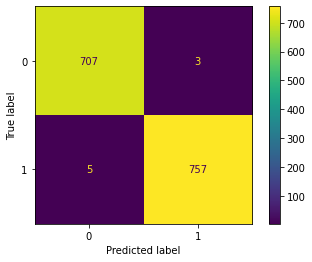

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       710
           1       1.00      0.99      0.99       762

    accuracy                           0.99      1472
   macro avg       0.99      0.99      0.99      1472
weighted avg       0.99      0.99      0.99      1472



In [10]:
cm = confusion_matrix(test_target, pred_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()
print(classification_report(test_target,pred_data))

In [11]:
# Multiclass LDA

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
pred_data = clf.predict(X_test)
print(pred_data.shape)


(7000,)


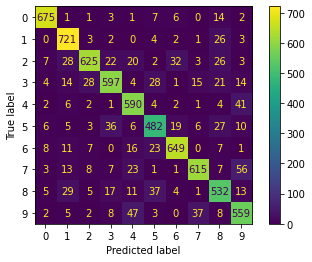

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       710
           1       0.87      0.95      0.90       762
           2       0.91      0.81      0.86       768
           3       0.86      0.82      0.84       726
           4       0.82      0.90      0.86       653
           5       0.82      0.80      0.81       600
           6       0.91      0.90      0.90       722
           7       0.91      0.84      0.87       734
           8       0.79      0.81      0.80       654
           9       0.80      0.83      0.81       671

    accuracy                           0.86      7000
   macro avg       0.86      0.86      0.86      7000
weighted avg       0.87      0.86      0.86      7000



In [12]:
cm = confusion_matrix(Y_test, pred_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()
print(classification_report(Y_test,pred_data))